### Import Useful Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Import data and process it

In [2]:
df= pd.read_csv("Folds5x2_pp.csv")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.5,1009.23,96.62,473.9
...,...,...,...,...,...
47839,15.12,48.92,1011.8,72.93,462.59
47840,33.41,77.95,1010.3,59.72,432.9
47841,15.99,43.34,1014.2,78.66,465.96
47842,17.65,59.87,1018.58,94.65,450.93


In [3]:
df.describe()

,AT,V,AP,RH,PE
count,47844,47844,47844,47844,47844
unique,2774,635,2518,4547,4837
top,25.21,41.17,1013.88,100.09,468.8
freq,70,305,80,130,45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AT      47844 non-null  object
 1   V       47844 non-null  object
 2   AP      47844 non-null  object
 3   RH      47844 non-null  object
 4   PE      47844 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


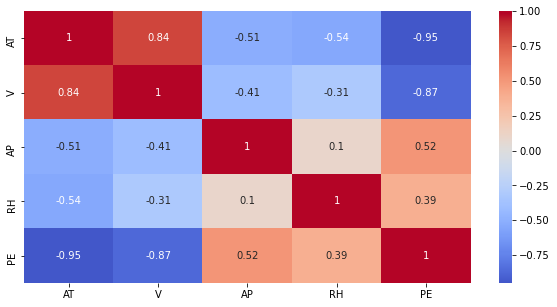

In [5]:
df = df.apply(pd.to_numeric, errors='coerce')

corr = df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True)
plt.show()

In [6]:
df.dropna(inplace=True)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the data into the Training and Test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Model Implementation using Random Forest Regression

In [8]:
from sklearn.ensemble import RandomForestRegressor

#Training the Model
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [9]:
#Testing the Model
y_pred = model.predict(X_test)

### Model Performance Evaluation

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error

# Training performance
accuracy_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"The extent of accuracy of the train set is: {accuracy_train} \nThe mean abs error of the train set is: {mae_train}")

The extent of accuracy of the train set is: 0.9997996509252572 
The mean abs error of the train set is: 0.06458193979936963


In [11]:
# Testing performance
accuracy_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print(f"The extent of accuracy of the train set is: {accuracy_test} \nThe mean abs error of the train set is: {mae_test}")

The extent of accuracy of the train set is: 0.9993415438025305 
The mean abs error of the train set is: 0.16447115384618397


In [12]:
print(y_test)

[447.96 439.4  482.26 ... 448.79 429.31 443.57]


In [13]:
print(X_test)

[[  22.86   62.52 1016.23   70.67]
 [  23.02   69.94 1007.94   64.66]
 [  10.2    40.67 1016.15   73.2 ]
 ...
 [  20.3    58.46 1015.93   82.13]
 [  32.38   69.05 1000.76   45.85]
 [  18.61   67.71 1004.07   84.49]]


### Test with some input values

In [14]:
#Test with some values.
temperture = 20.00          # °C
exhaust_vacuum = 58.00      # %
ambient_pressure = 1000.00  # in millibar
relative_humidity = 82.00   # %

# Predict electrical output power
y_predîct = model.predict([[temperture, exhaust_vacuum, ambient_pressure, relative_humidity]])

print(f"The predicted electrical energy output is: {y_predîct[0]} MW")

The predicted electrical energy output is: 447.33900000000006 MW
